## クラスターのスタック像描写のnotebook

### 使用データファイル場所  
/raw_data/cluster/181109-aldocaGCaMP-6dpf-fish5-D20um-nostim1-TurboTransAcc-10000dFF-snapshots.ome

### 解析内容  
100フレームをスタックして一つの像をする。時系列順にRed、Green、Blueに色付けしさらにスタックを行った(1. stack 100 frame)。  
試し解析に50フレームでスタックした像もプロットしてある(2. stack 50 frame)。

In [2]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import cv2
import os


### 1. stack 100frame (__Figure 3a__)

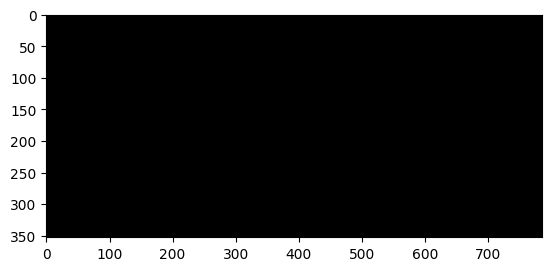

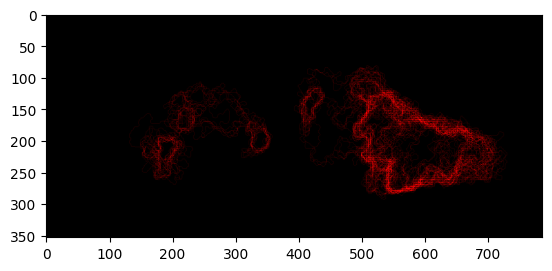

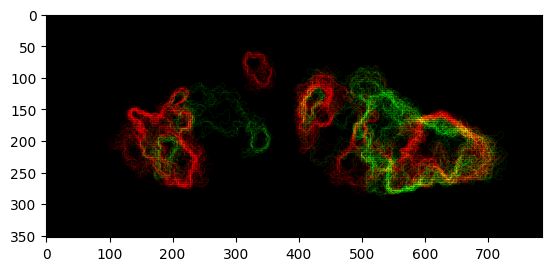

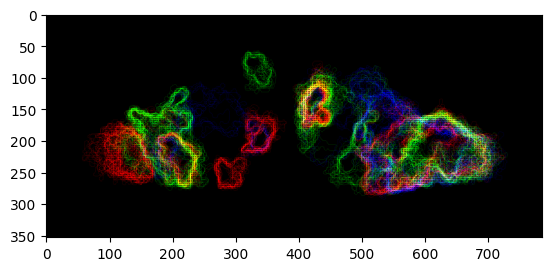

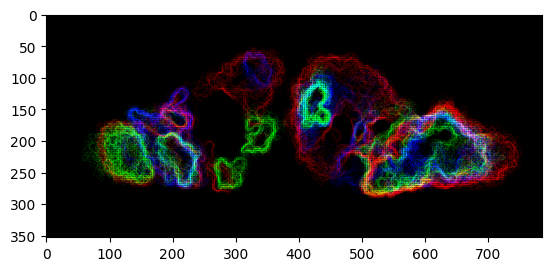

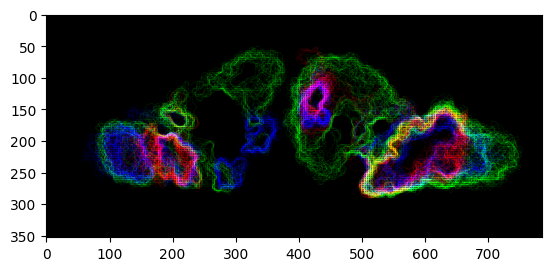

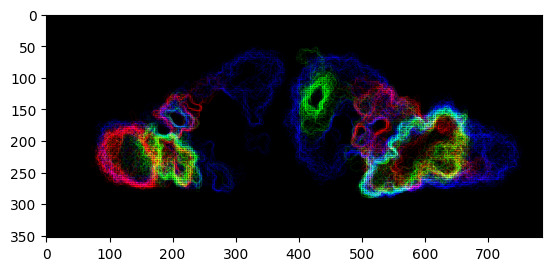

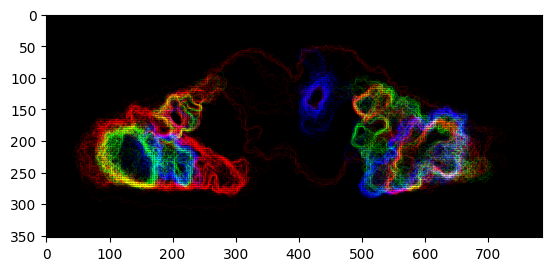

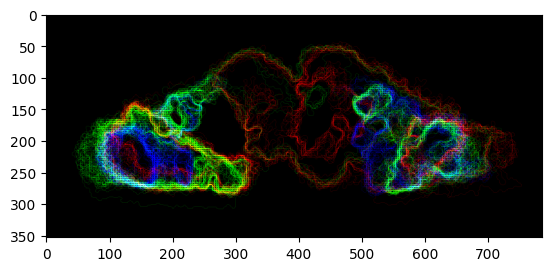

In [3]:
#BGRの順番で保存し3つの画像を重ね合わせる

#　ファイル名の取得とsort
file_path = "../../raw_data/cluster/181109-aldocaGCaMP-6dpf-fish5-D20um-nostim1-TurboTransAcc-10000dFF-snapshots.ome/"
files= glob.glob(file_path + '*.tif')
file_names = sorted([f.split("/")[-1] for f in files])

# plotする画像初期化
img1 = cv2.imread(files[0])
img2 = cv2.imread(files[0])

img1[:,:,:] = 0
img2[:,:,:] = 0

#gとbを初期化
img_gbr = cv2.split(img2)
g = img_gbr[2]
b = img_gbr[2]


for i, file_name in enumerate(file_names): # 
    img1[:,:,:] = 0
    img = cv2.imread(file_path+file_name,0)
    contours,hierarchy  = cv2.findContours(img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)#要注意(RETR_EXTERNAL:このフラグを使うと，全子要素は無視され最も外側の輪郭のみが返されます)cv2.CHAIN_APPROX_NONE : 全て。
    img_contour = cv2.drawContours(img1,contours,-1,(0,0,30),1)#要注意,なぜか引数であるimg1が変更されていた
    img2 = cv2.add(img2,img_contour)#確認済み

    
    if i % 100 == 0 and i % 200 != 0:
        #rとの合成とgの更新
        img_bgr = cv2.split(img2)
        r = img_bgr[2]
        img_merge = cv2.merge((g,b,r))
        img_RGB = cv2.cvtColor(img_merge, cv2.COLOR_BGR2RGB) # BGRからRGBに変更
        plt.imshow(img_RGB)
        plt.show()


        g = img_bgr[2]
        img2[:,:,:] = 0

    elif i % 100 == 0 and i % 200 == 0:
        #rとの合成とbの更新
        img_bgr = cv2.split(img2)
        r = img_bgr[2]
        img_merge = cv2.merge((b,g,r))
        img_RGB = cv2.cvtColor(img_merge, cv2.COLOR_BGR2RGB)# BGRからRGBに変更
        plt.imshow(img_RGB)
        plt.show()

        b = img_bgr[2]
        img2[:,:,:] = 0

- matplotlibはRGBだが、opencvはBGRなので出力に注意
- 現在が赤色、一つ前が緑、二つ前が青となるようにした
- それぞれの単色とマージ像を示す。
- 過去二つよりも以前の状況と比較してみる
- 領域の伸び縮みも観察できるのでそこについても考察

### 2. stack 50 frame

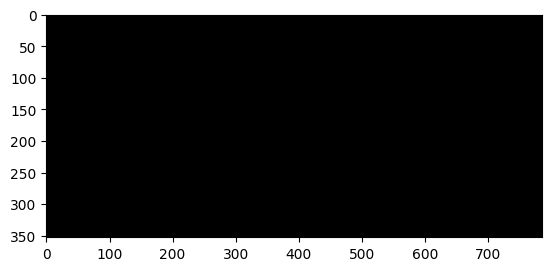

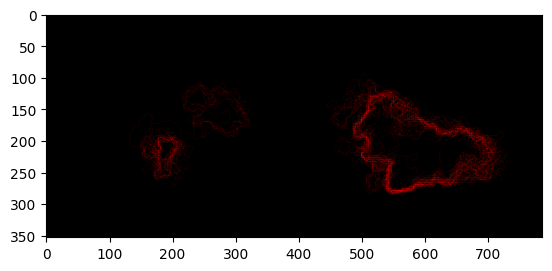

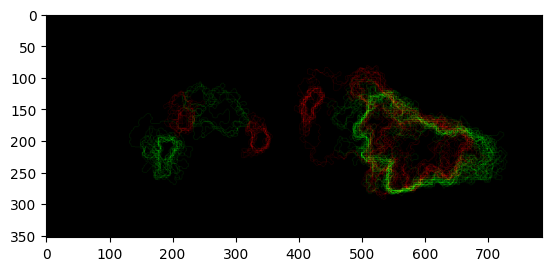

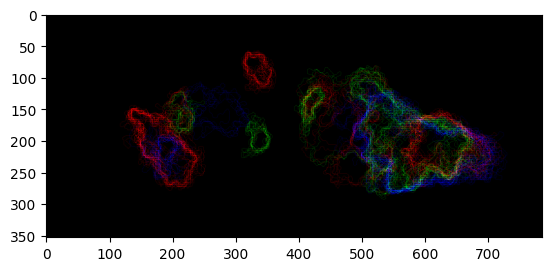

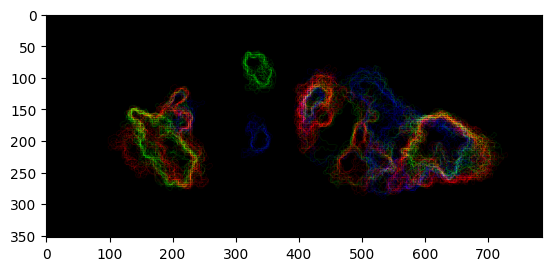

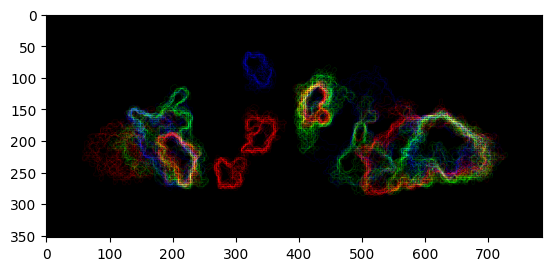

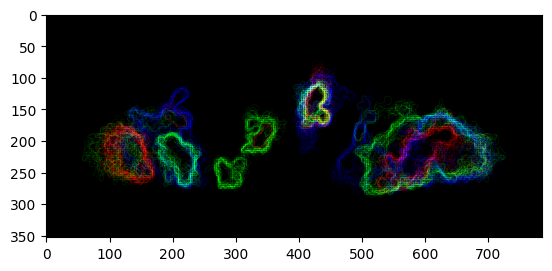

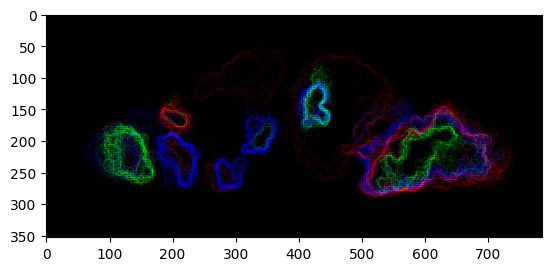

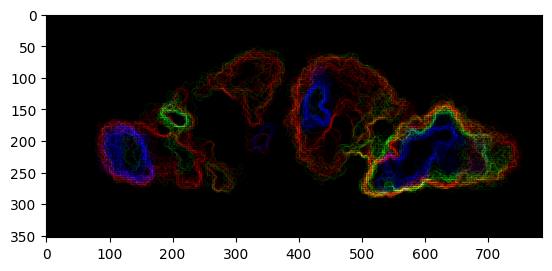

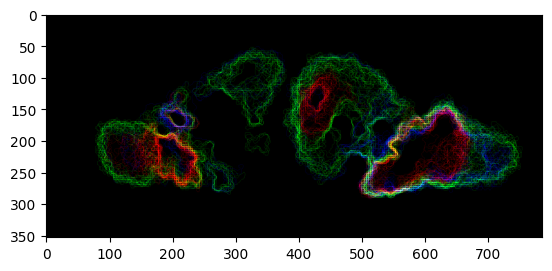

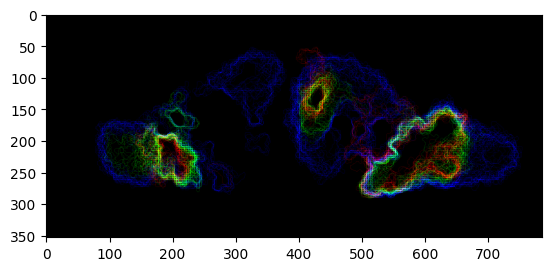

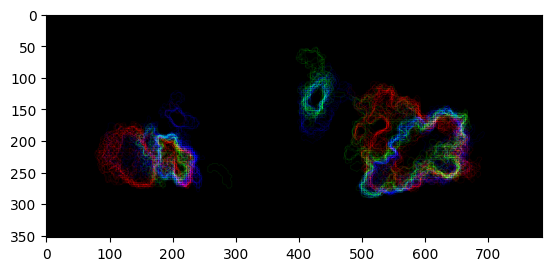

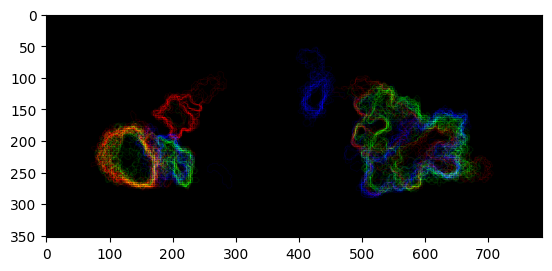

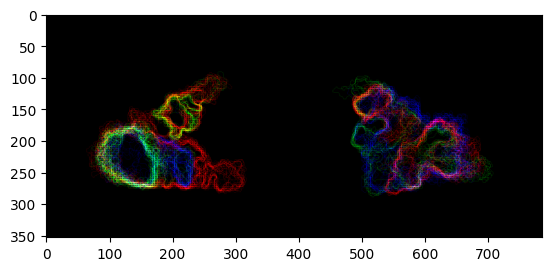

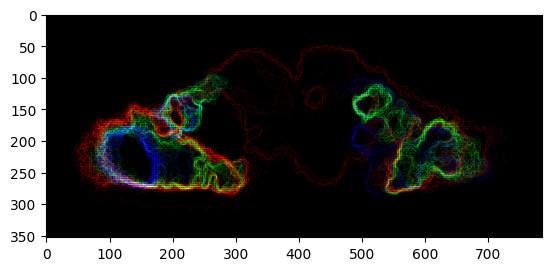

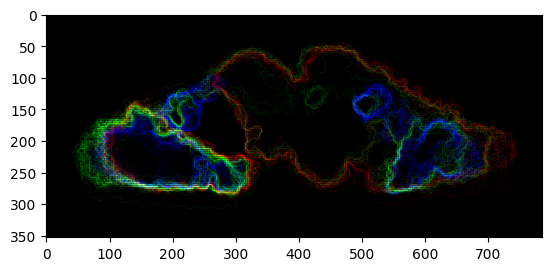

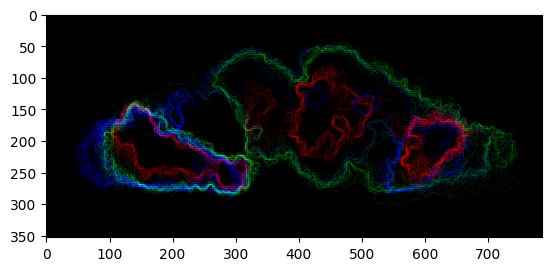

In [4]:
#BGRの順番で保存し3つの画像を重ね合わせる

#　ファイル名の取得とsort
file_path = "../../raw_data/cluster/181109-aldocaGCaMP-6dpf-fish5-D20um-nostim1-TurboTransAcc-10000dFF-snapshots.ome/"
files= glob.glob(file_path + '*.tif')
file_names = sorted([f.split("/")[-1] for f in files])

# plotする画像初期化
img1 = cv2.imread(files[0])
img2 = cv2.imread(files[0])

img1[:,:,:] = 0
img2[:,:,:] = 0

#gとbを初期化
img_gbr = cv2.split(img2)
g = img_gbr[2]
b = img_gbr[2]


for i, file_name in enumerate(file_names): # 
    img1[:,:,:] = 0
    img = cv2.imread(file_path+file_name,0)
    contours,hierarchy  = cv2.findContours(img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)#要注意(RETR_EXTERNAL:このフラグを使うと，全子要素は無視され最も外側の輪郭のみが返されます)cv2.CHAIN_APPROX_NONE : 全て。
    img_contour = cv2.drawContours(img1,contours,-1,(0,0,30),1)#要注意,なぜか引数であるimg1が変更されていた
    img2 = cv2.add(img2,img_contour)#確認済み

    
    if i % 50 == 0 and i % 100 != 0:
        #rとの合成とgの更新
        img_bgr = cv2.split(img2)
        r = img_bgr[2]
        img_merge = cv2.merge((g,b,r))
        img_RGB = cv2.cvtColor(img_merge, cv2.COLOR_BGR2RGB) # BGRからRGBに変更
        plt.imshow(img_RGB)
        plt.show()


        g = img_bgr[2]
        img2[:,:,:] = 0

    elif i % 50 == 0 and i % 100 == 0:
        #rとの合成とbの更新
        img_bgr = cv2.split(img2)
        r = img_bgr[2]
        img_merge = cv2.merge((b,g,r))
        img_RGB = cv2.cvtColor(img_merge, cv2.COLOR_BGR2RGB)# BGRからRGBに変更
        plt.imshow(img_RGB)
        plt.show()

        b = img_bgr[2]
        img2[:,:,:] = 0

- 中心部では独立した活動が見られ、活動領域の重なり合いがすくない
- 外側では中心部と比較して活動領域が重なりあうことが多いように感じられる（活動の複雑さの違いなのかもしれない）
- 外側と内側では活動における周囲のプルキンエ細胞のふるまい方がことなるように感じられる。